<a href="https://colab.research.google.com/github/SwastikGorai/Playground-Series/blob/main/Season_3/Playground_Series_Season_3%2C_Episode_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install seaborn matplotlib pandas kaggle plotly -q

In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as ply
import numpy as np

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
!kaggle competitions download -c playground-series-s3e14

  0% 0.00/634k [00:00<?, ?B/s]
100% 634k/634k [00:00<00:00, 166MB/s]


In [8]:
!unzip playground-series-s3e14.zip

Archive:  playground-series-s3e14.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [15]:
trainds = pd.read_csv('train.csv')
testds = pd.read_csv('test.csv')
subm = pd.read_csv('sample_submission.csv')

In [13]:
trainds.head(10)

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887,4476.81146
1,1,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317,5548.12201
2,2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781,6869.77760
3,3,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.565976,0.478137,39.467561,6880.77590
4,4,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.579677,0.494165,40.484512,7479.93417
5,5,25.0,0.50,0.25,0.63,0.75,94.6,57.2,79.0,68.2,33.0,55.9,34.0,0.56,0.565239,0.484350,40.555019,7267.28344
6,6,12.5,0.25,0.38,0.50,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.498730,0.442193,35.517539,5739.68029
7,7,12.5,0.25,0.25,0.75,0.75,86.0,52.0,71.9,62.0,30.0,50.8,1.0,0.10,0.619888,0.529502,42.191013,7920.06175
8,8,25.0,0.50,0.38,0.38,0.75,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.532557,0.465367,36.166044,6465.37205
9,9,25.0,0.50,0.25,0.63,0.63,94.6,57.2,79.0,68.2,33.0,55.9,34.0,0.56,0.340063,0.381768,28.763565,3519.43131


In [16]:
subm.head()

,id,yield
0,15289,6025.194
1,15290,6025.194
2,15291,6025.194
3,15292,6025.194
4,15293,6025.194


In [23]:
trainds.drop('id', axis = 1).describe()

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
count,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000
mean,19.704690,0.389314,0.286768,0.492675,0.592355,82.169887,49.673281,68.656256,59.229538,28.660553,48.568500,18.660865,0.324176,0.502741,0.446553,36.164950,6025.193999
std,6.595211,0.361643,0.059917,0.148115,0.139489,9.146703,5.546405,7.641807,6.610640,3.195367,5.390545,11.657582,0.163905,0.074390,0.037035,4.031087,1337.056850
min,10.000000,0.000000,0.000000,0.000000,0.000000,69.700000,39.000000,58.200000,50.200000,24.300000,41.200000,1.000000,0.060000,0.192732,0.311921,22.079199,1945.530610
25%,12.500000,0.250000,0.250000,0.380000,0.500000,77.400000,46.800000,64.700000,55.800000,27.000000,45.800000,16.000000,0.260000,0.458246,0.419216,33.232449,5128.163510
50%,25.000000,0.500000,0.250000,0.500000,0.630000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,16.000000,0.260000,0.506600,0.446570,36.040675,6117.475900
75%,25.000000,0.500000,0.380000,0.630000,0.750000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,24.000000,0.390000,0.560445,0.474134,39.158238,7019.694380
max,40.000000,18.430000,0.585000,0.750000,0.750000,94.600000,57.200000,79.000000,68.200000,33.000000,55.900000,34.000000,0.560000,0.652144,0.535660,46.585105,8969.401840


In [26]:
testds.drop('id', axis = 1).describe()

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds
count,10194.000000,10194.000000,10194.000000,10194.000000,10194.000000,10194.000000,10194.000000,10194.000000,10194.000000,10194.000000,10194.000000,10194.000000,10194.000000,10194.000000,10194.000000,10194.000000
mean,19.795958,0.391606,0.286307,0.491328,0.593222,82.207014,49.697204,68.687816,59.256465,28.674779,48.592643,18.507360,0.322501,0.501809,0.446345,36.136349
std,6.591864,0.390022,0.059867,0.148166,0.139897,9.153442,5.552286,7.647629,6.617055,3.198282,5.395790,11.780074,0.165342,0.074707,0.037054,4.019885
min,10.000000,0.000000,0.000000,0.000000,0.000000,69.700000,39.000000,58.200000,50.200000,24.300000,41.200000,1.000000,0.060000,0.233554,0.311921,24.320627
25%,12.500000,0.250000,0.250000,0.380000,0.500000,77.400000,46.800000,64.700000,55.800000,27.000000,45.800000,16.000000,0.260000,0.458246,0.418867,33.231910
50%,25.000000,0.500000,0.250000,0.500000,0.630000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,16.000000,0.260000,0.506346,0.446570,36.013557
75%,25.000000,0.500000,0.380000,0.630000,0.750000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,24.000000,0.390000,0.559325,0.472670,39.127263
max,37.500000,18.430000,0.585000,0.750000,0.750000,94.600000,57.200000,79.000000,68.200000,33.000000,55.900000,34.000000,0.560000,0.652144,0.535660,46.139425


In [24]:
trainds.isna().sum()

id                      0
clonesize               0
honeybee                0
bumbles                 0
andrena                 0
osmia                   0
MaxOfUpperTRange        0
MinOfUpperTRange        0
AverageOfUpperTRange    0
MaxOfLowerTRange        0
MinOfLowerTRange        0
AverageOfLowerTRange    0
RainingDays             0
AverageRainingDays      0
fruitset                0
fruitmass               0
seeds                   0
yield                   0
dtype: int64

In [25]:
testds.isna().sum()

id                      0
clonesize               0
honeybee                0
bumbles                 0
andrena                 0
osmia                   0
MaxOfUpperTRange        0
MinOfUpperTRange        0
AverageOfUpperTRange    0
MaxOfLowerTRange        0
MinOfLowerTRange        0
AverageOfLowerTRange    0
RainingDays             0
AverageRainingDays      0
fruitset                0
fruitmass               0
seeds                   0
dtype: int64

In [59]:
trainds = trainds.drop('id', axis = 1)
testds = testds.drop('id', axis = 1)

In [47]:
cols = trainds.select_dtypes(include = 'number').columns
nrows = len(cols)
nrows
cols

Index(['clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange',
       'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange',
       'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds',
       'yield'],
      dtype='object')

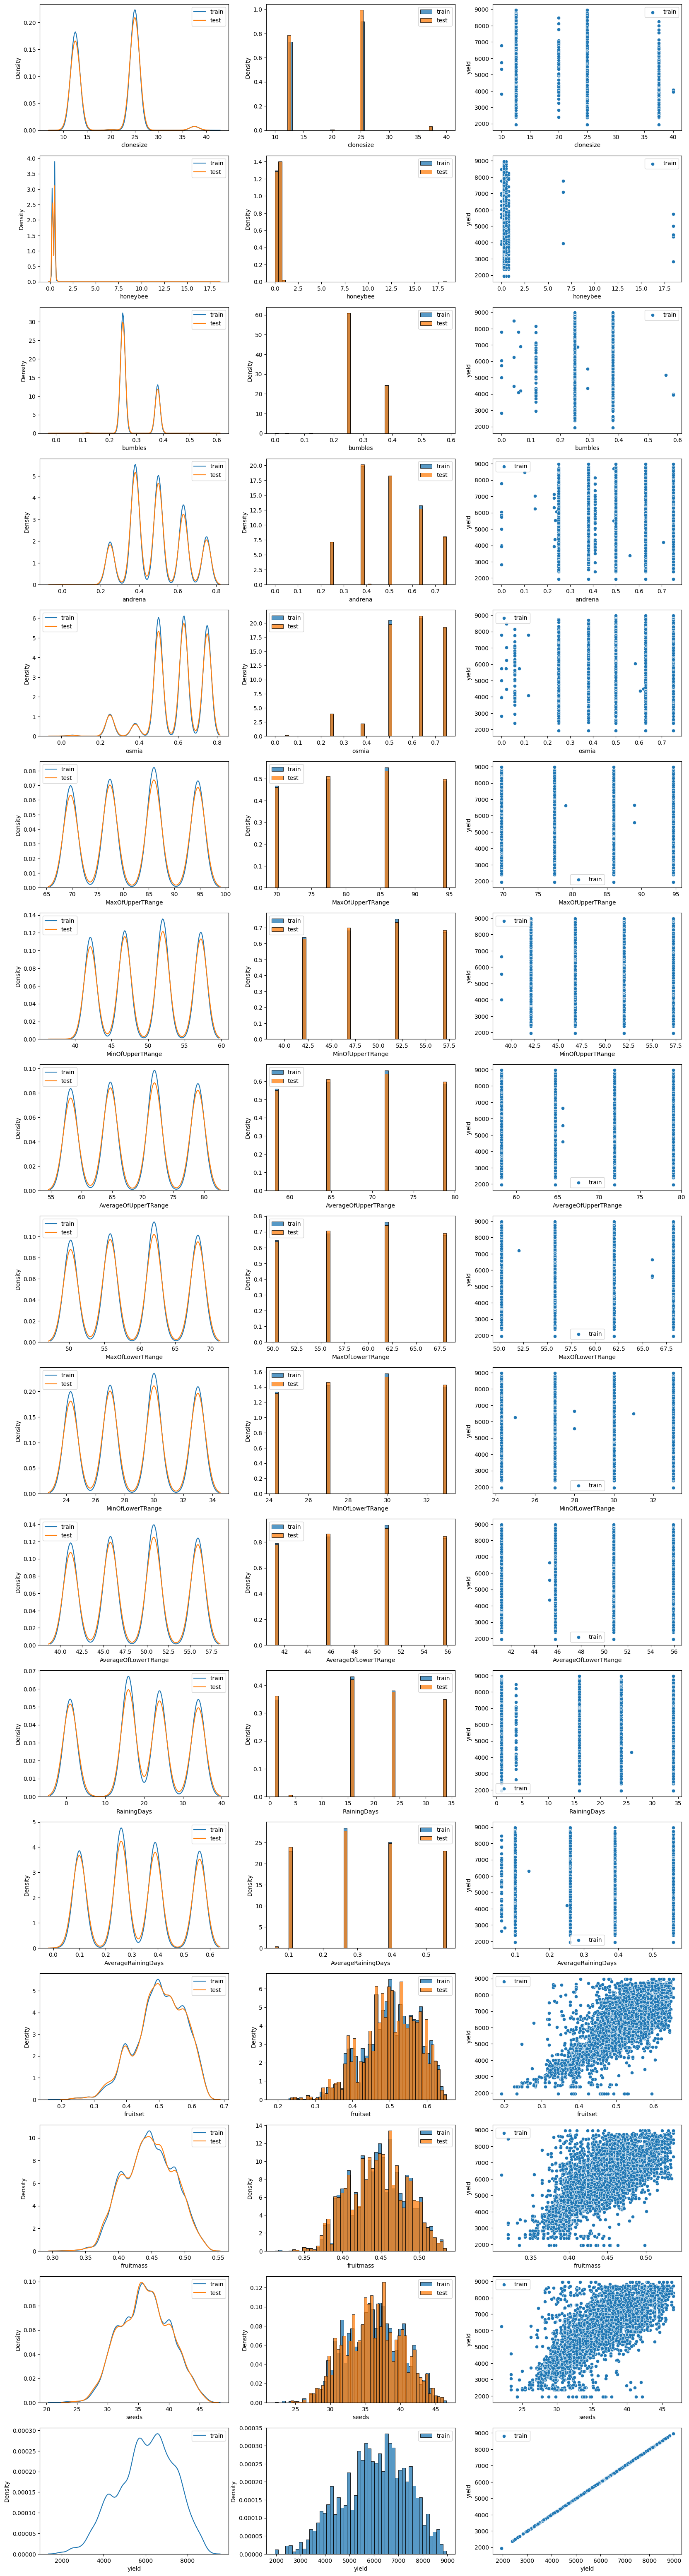

In [53]:
fig, axes = plt.subplots( nrows = nrows, ncols = 3, figsize =(20, 80))
axes = axes.flatten()
idx = 0
for col in cols:
  sns.kdeplot(trainds[col], label='train', ax=axes[idx], fill=False)
  sns.histplot(trainds[col], label='train', ax=axes[idx + 1], stat="density", bins=50)
  if col != 'yield':
        sns.kdeplot(testds[col], label='test', ax=axes[idx], fill=False)
        sns.histplot(testds[col], label='test', ax=axes[idx + 1], stat="density", bins=50)
  sns.scatterplot(x=col, y="yield", label='train', ax=axes[idx + 2], data=trainds)
  axes[idx].legend()
  axes[idx+1].legend()
  axes[idx+2].legend()
  idx+=3

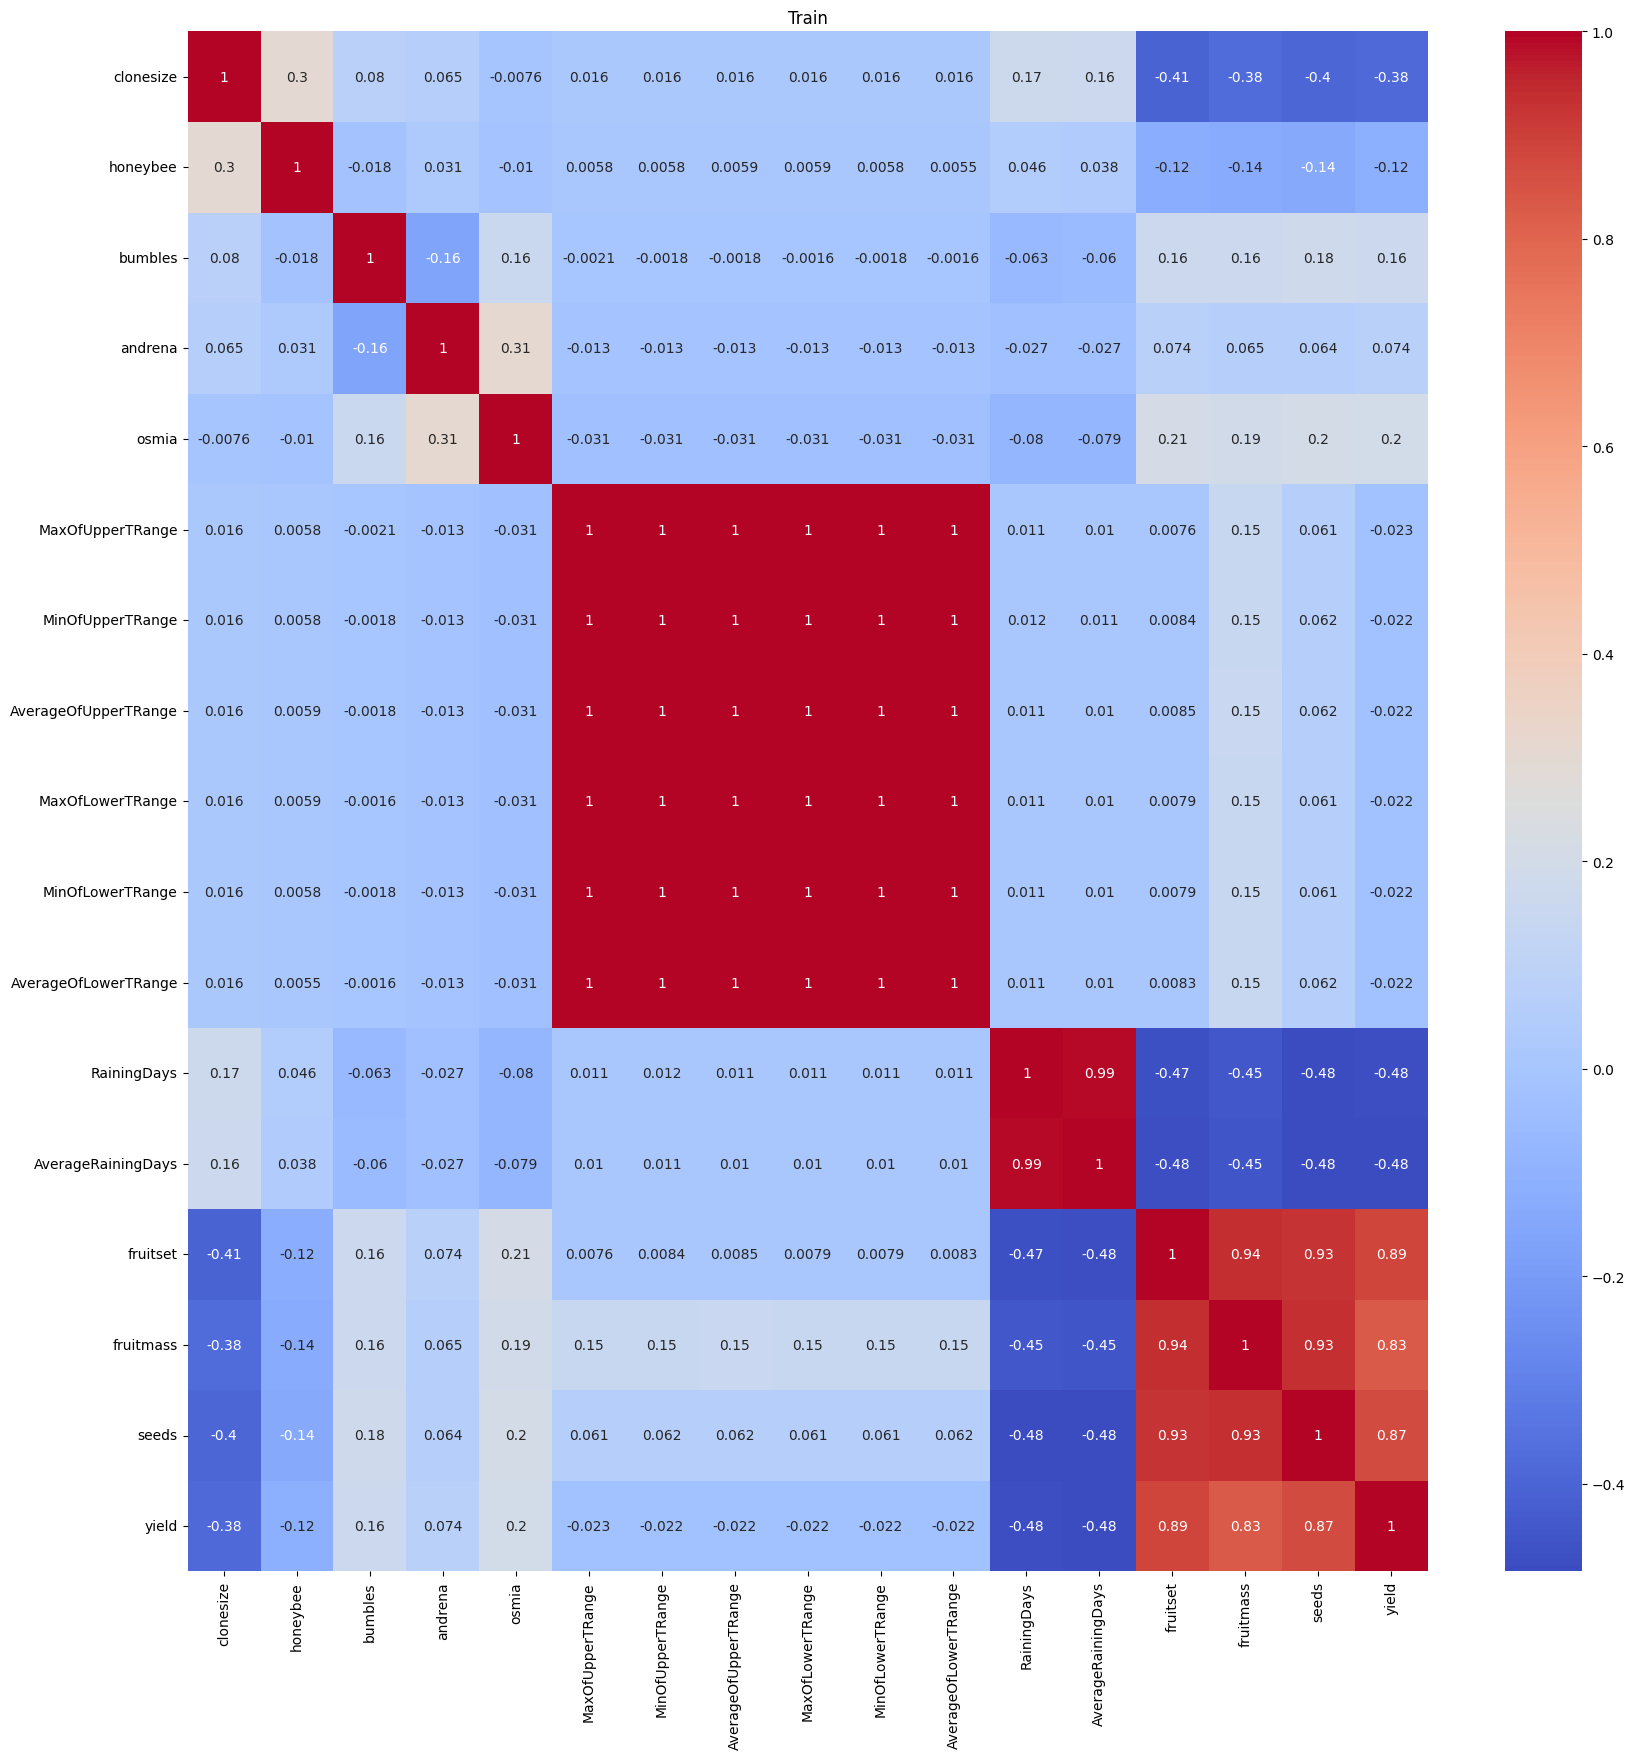

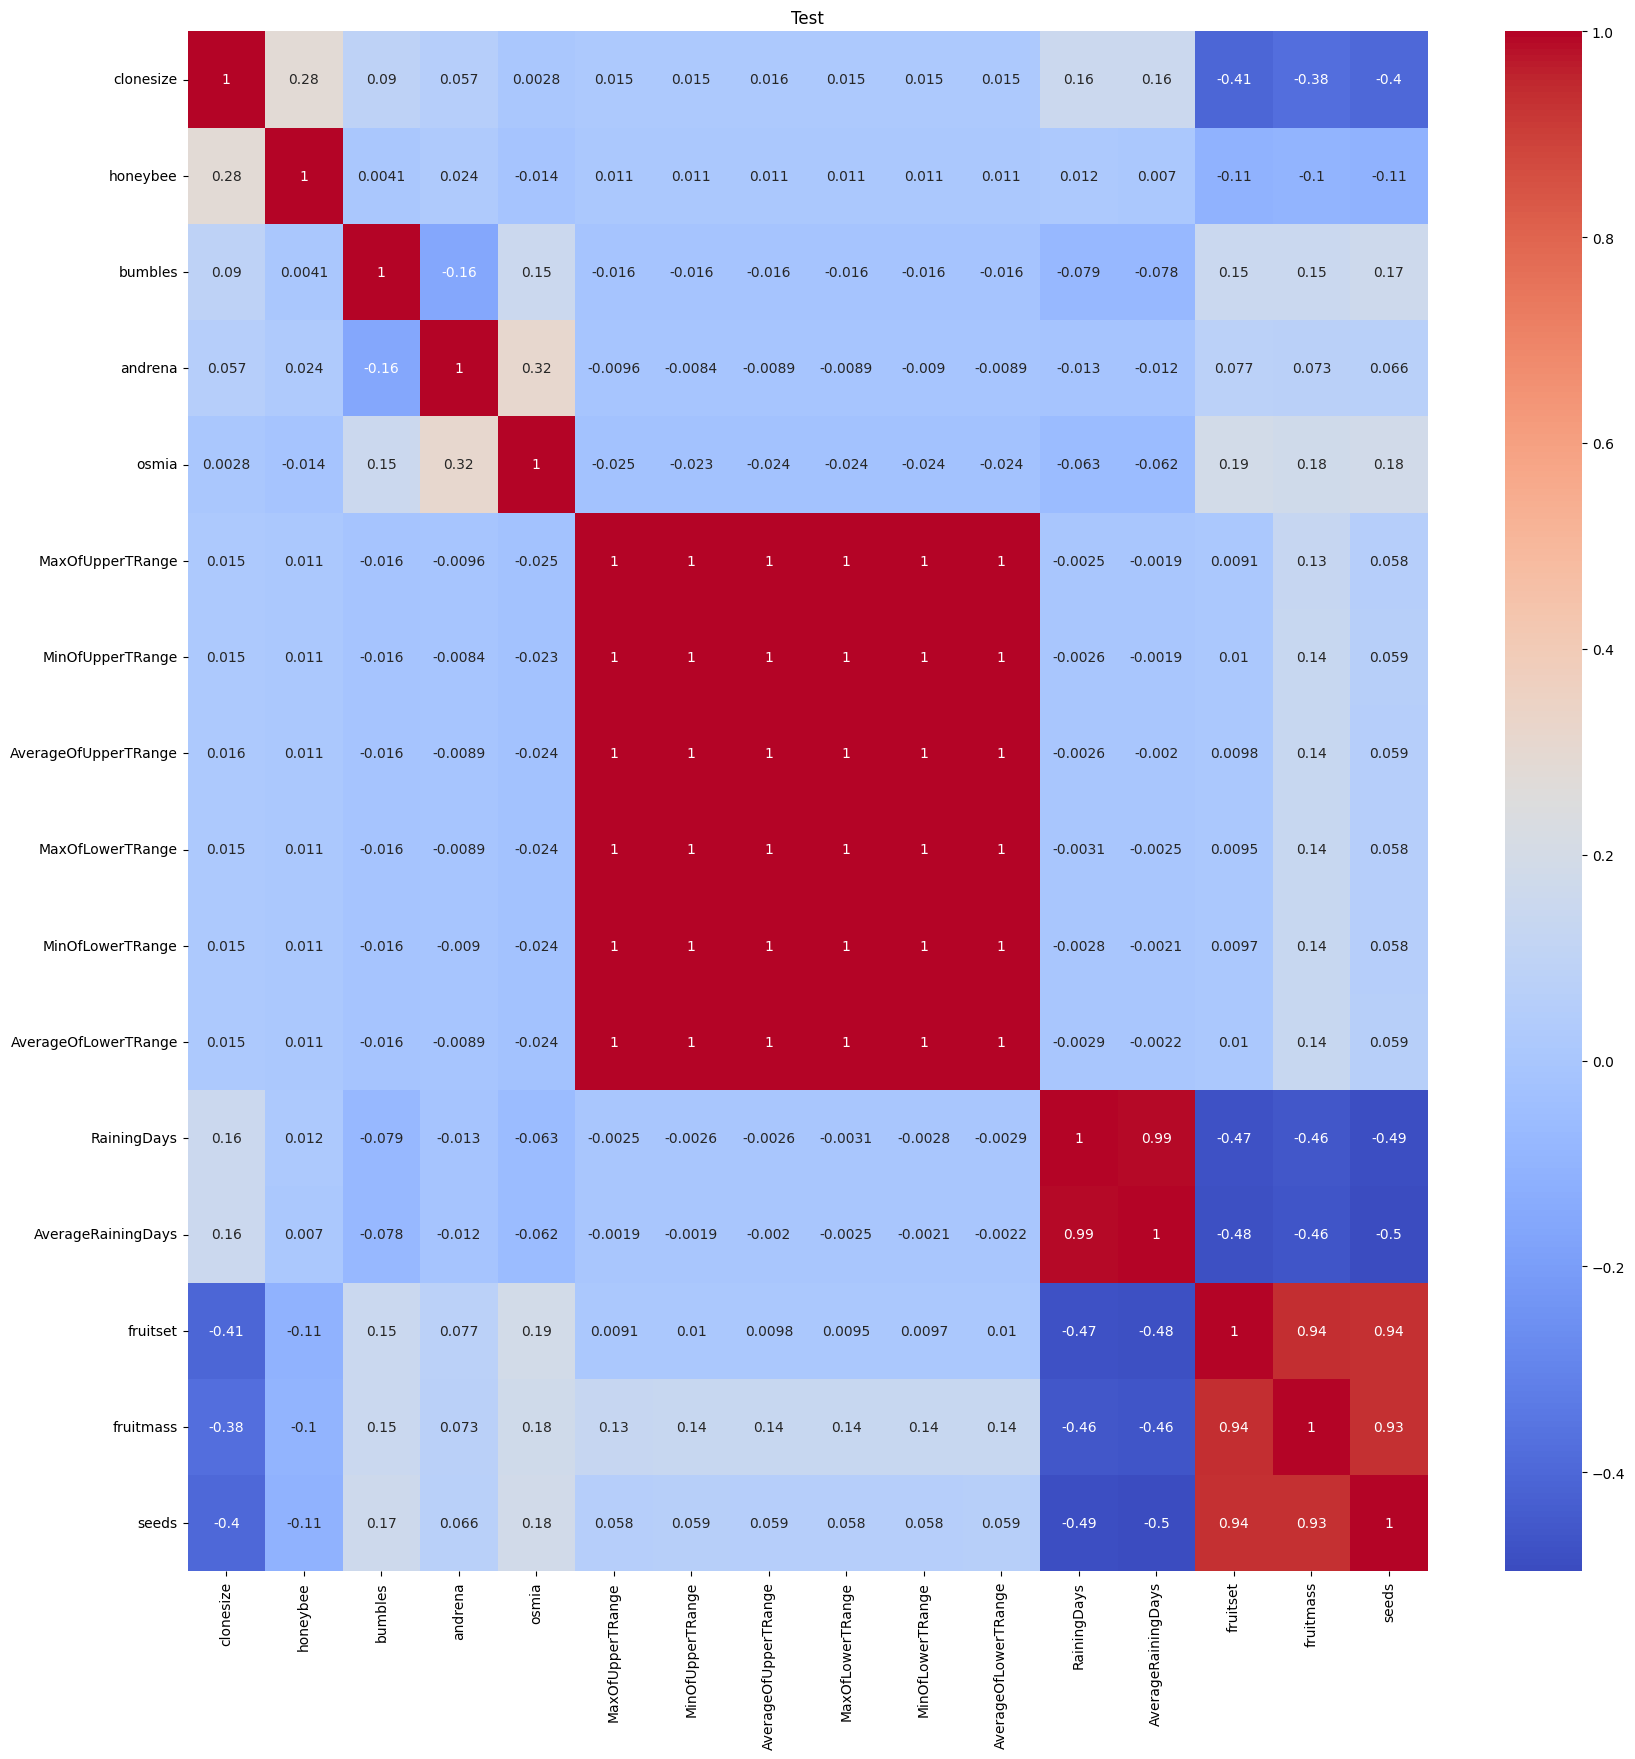

In [60]:
def corrmat(df, title):
  plt.figure(figsize = (20,20))
  sns.heatmap(df.corr(), cmap = 'coolwarm', annot = True)
  plt.title(title)  
  plt.show()
corrmat(trainds, 'Train')
corrmat(testds, 'Test')

In [72]:
upperTrig = trainds.corr().where(np.triu(np.ones(trainds.corr().shape), k = 1).astype(bool))
to_drop = [column for column in upperTrig.columns if any(upperTrig[column] >0.95)]
to_drop

['MinOfUpperTRange',
 'AverageOfUpperTRange',
 'MaxOfLowerTRange',
 'MinOfLowerTRange',
 'AverageOfLowerTRange',
 'AverageRainingDays']

In [73]:
trainds.drop(to_drop, axis = 1, inplace = True)
testds.drop(to_drop, axis = 1, inplace = True)

In [80]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_Scaled = scaler.fit_transform(trainds.drop('yield', axis = 1))
test_scaled = scaler.transform(testds)
y = trainds['yield']

In [82]:
import lightgbm as lgb
clf = lgb.LGBMRegressor()
clf.fit(X_Scaled, y)

LGBMRegressor()

In [83]:
y_pred = clf.predict(test_scaled)

In [85]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, test_scaled)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(test_scaled, y_pred)))

array([4294.5678022 , 6221.92525621, 7162.59070485, ..., 6499.25208337,
       4431.86725334, 7313.50158427])

In [86]:
submission = pd.DataFrame()
submission['yield'] = y_pred
submission.index += 15289

In [87]:
submission

,yield
15289,4294.567802
15290,6221.925256
15291,7162.590705
15292,4576.610115
15293,3873.314128
...,...
25478,5454.104879
25479,5679.162357
25480,6499.252083
25481,4431.867253


In [88]:
submission.to_csv("submission.csv", index=True, header=True, index_label="id")

In [90]:
!kaggle competitions submit -c playground-series-s3e14 -f submission.csv -m "submission 1"

100% 239k/239k [00:02<00:00, 84.9kB/s]
Successfully submitted to Prediction of Wild Blueberry Yield